**Task -3 : Cat and Dog Image Classifier**

---
**Problem Statement:**

---

Develop an image classification model to
distinguish between images of cats and dogs
using data science techniques in Python.


Change the Runtime to GPU before running this codes


In [2]:
! pip install kaggle  #will install the official API which supports these commands

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json  #Change the permissions of the file.

Downloading the dataset from Kaggle

---



In [11]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification
# copy api from dataset

 64% 41.0M/64.4M [00:00<00:00, 118MB/s] 
100% 64.4M/64.4M [00:00<00:00, 146MB/s]


To unzip the dataset

---



In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cats-and-dogs-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Importing the Libraries

---



In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
# Initialising the generators for train and test data
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,  #Creating the generators with each batch of size = 32 images
    image_size=(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32, #Creating the generators with each batch of size = 32 images
    image_size=(256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [15]:
# Normalize - is a pre-processing technique used to standardize data.
#The rescale parameter ensures the input range in [0, 1]
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [16]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
18/18 [==============================] - 22s 218ms/step - loss: 6.8389 - accuracy: 0.5512 - val_loss: 1.3087 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 4s 157ms/step - loss: 5.3286 - accuracy: 0.5745 - val_loss: 4.3093 - val_accuracy: 0.4714
Epoch 3/10
18/18 [==============================] - 6s 241ms/step - loss: 4.1314 - accuracy: 0.6589 - val_loss: 4.0069 - val_accuracy: 0.5357
Epoch 4/10
18/18 [==============================] - 5s 196ms/step - loss: 2.5272 - accuracy: 0.6248 - val_loss: 2.9833 - val_accuracy: 0.5643
Epoch 5/10
18/18 [==============================] - 4s 157ms/step - loss: 2.2511 - accuracy: 0.6804 - val_loss: 6.7920 - val_accuracy: 0.4643
Epoch 6/10
18/18 [==============================] - 5s 171ms/step - loss: 2.5298 - accuracy: 0.7181 - val_loss: 5.9115 - val_accuracy: 0.5214
Epoch 7/10
18/18 [==============================] - 5s 195ms/step - loss: 2.1163 - accuracy: 0.7361 - val_loss: 5.2878 - val_accuracy: 0.5000
Epoch

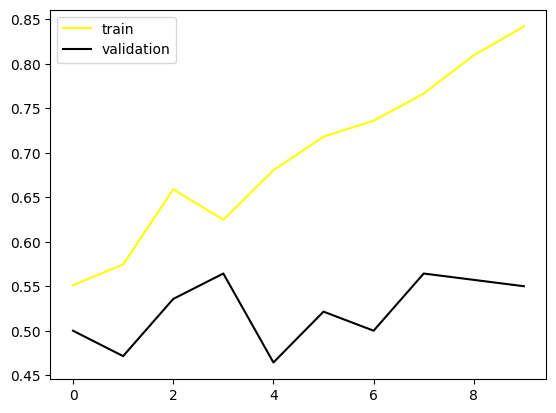

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='yellow',label='train')
plt.plot(history.history['val_accuracy'],color='black',label='validation')
plt.legend()
plt.show()

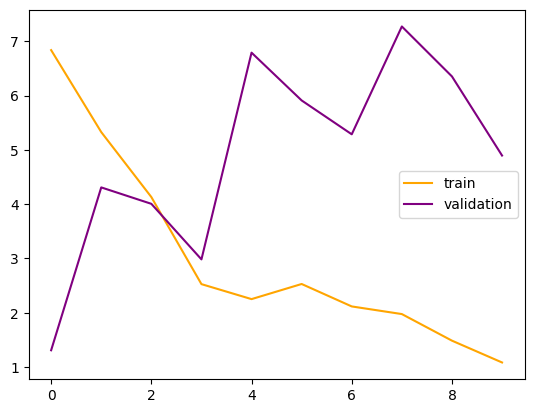

In [21]:
plt.plot(history.history['loss'],color='orange',label='train')
plt.plot(history.history['val_loss'],color='purple',label='validation')
plt.legend()
plt.show()

In [24]:
import cv2   #OpenCV packages for python

In [25]:
test_img = cv2.imread('/content/test/dogs/dog_123.jpg')

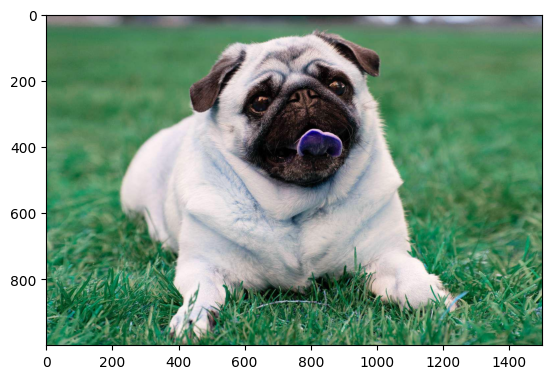

In [26]:
plt.imshow(test_img)

In [27]:
test_img.shape

(1000, 1500, 3)

In [28]:
test_img = cv2.resize(test_img,(256,256))

In [29]:
test_input = test_img.reshape((1,256,256,3))

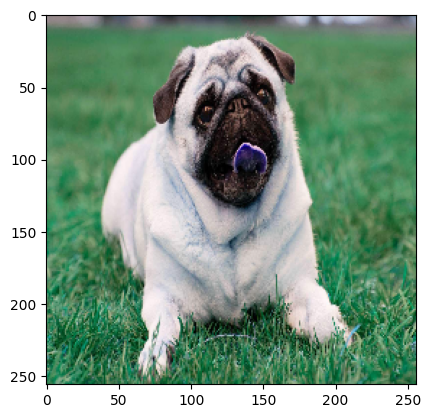

In [30]:
plt.imshow(test_img)

In [33]:
pred = model.predict(test_input)
if(pred == [0]):
  print("Its CAT Image")
else:
  print("Its DOG Image")

print(pred)

1/1 [==============================] - 0s 29ms/step
Its DOG Image
[[1.]]


* **0 represents Cats**
* **1 represents Dogs**
* **therefore the made prediction is correct.**

---

